<a href="https://colab.research.google.com/github/KenDaupsey/Neural-Networks-and-Deep-Learning-Regression-/blob/main/Neural_Networks_and_Deep_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Neural Networks and Deep Learning Regression ***

In [14]:
###Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [13]:
#Load dataset
# import pandas as pd
url= "https://raw.githubusercontent.com/KenDaupsey/Neural-Networks-and-Deep-Learning-Regression-/main/hsb2%7Edata.csv"
df= pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [3]:
# Select features and target variable
features = ['read', 'write']
target = 'math'

X = df[features]
y = df[target]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 11), (160, 2), (40, 2), (160,), (40,))

In [6]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=len(features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
### Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

In [9]:
# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error: {mse}')

2/2 [==============================] - 0s 13ms/step - loss: 48.5409
Mean Squared Error: 48.54086685180664


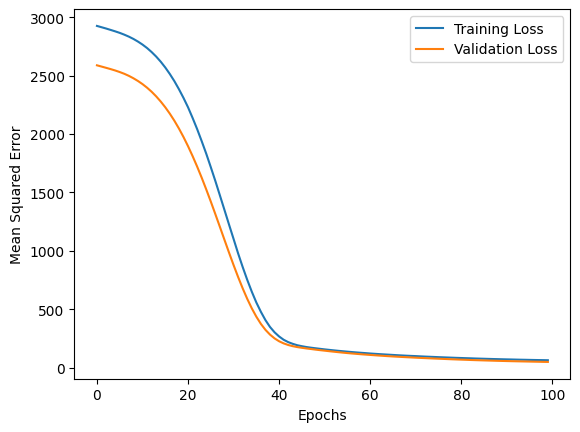

In [10]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [12]:
# Make a prediction for a new data point
new_data_point_nn = pd.DataFrame({'read': [80], 'write': [75]})
new_data_point_nn_scaled = scaler.transform(new_data_point_nn)
nn_prediction = model.predict(new_data_point_nn_scaled)
print(f"Prediction using Neural Network: {nn_prediction[0][0]}")

1/1 [==============================] - 0s 29ms/step
Prediction using Neural Network: 96.26023864746094


*** The Entire Code for Neural Networks Linear Regression Model Implementation ***

2/2 [==============================] - 0s 8ms/step - loss: 48.0047
Mean Squared Error: 48.004669189453125


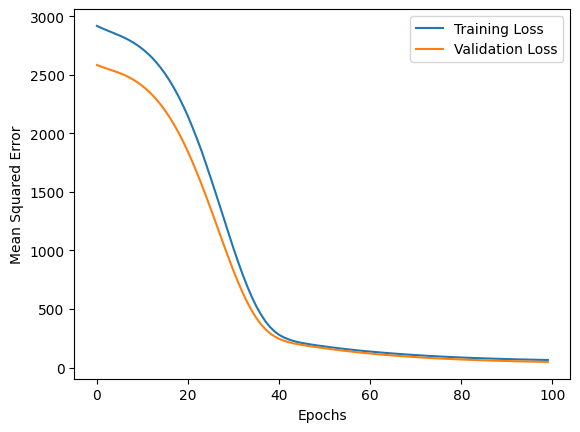

1/1 [==============================] - 0s 70ms/step
Prediction using Neural Network: 99.86508178710938


In [15]:
###Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

#Load dataset
# import pandas as pd
url= "https://raw.githubusercontent.com/KenDaupsey/Neural-Networks-and-Deep-Learning-Regression-/main/hsb2%7Edata.csv"
df= pd.read_csv(url)

df.head()
# Select features and target variable
features = ['read', 'write']
target = 'math'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=len(features)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error: {mse}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Make a prediction for a new data point
new_data_point_nn = pd.DataFrame({'read': [80], 'write': [75]})
new_data_point_nn_scaled = scaler.transform(new_data_point_nn)
nn_prediction = model.predict(new_data_point_nn_scaled)
print(f"Prediction using Neural Network: {nn_prediction[0][0]}")